# Ragged structures in $\sigma(gg \rightarrow H)$ within the hMSSM tuple


This notebook displays some irregular, ragged structures found among the values of $\sigma(gg \rightarrow H)$ along $\tan \beta$

**hMSSM TWiki:**

https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHXSWGMSSMNeutral#ROOT_histograms_MSSM_benchmark_s

**Using the following file as input:**

hMSSM_13TeV.root:
https://twiki.cern.ch/twiki/pub/LHCPhysics/HXSWG3LowTanB/hMSSM_13TeV.root


In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

In [2]:
import functools
import plotting.hMSSM as hMSSM_plot
import matplotlib_utils.plot_func as plu
import itertools

In [3]:
load_mpl_style('ATLAS.mplstyle')

Loading in datasets

In [4]:
xs_gg_H = pd.read_csv('./data/ascii/written_with_mssm_tools_mA_5.0_tanb_0.11_int_on.dat', delim_whitespace=True)
#m_H = pd.read_csv('./data/ascii/directly_from_root_file_m_H.dat', delim_whitespace=True, names=['mA', 'tanb', 'mH'])
#br_H_hh = pd.read_csv('./data/ascii/directly_from_root_file_br_H_hh.dat', delim_whitespace=True, names=['mA', 'tanb', 'br_H_hh'])

In [5]:
df_all = xs_gg_H

Some example for the contents:

In [6]:
df_all[3000:3010]

,mA,tanb,xsec_gg_H
3000,555.0,1.00,2.488678
3001,555.0,1.11,2.120219
3002,555.0,1.22,1.849369
3003,555.0,1.33,1.776753
3004,555.0,1.44,1.462824
3005,555.0,1.55,1.177633
3006,555.0,1.66,1.039731
3007,555.0,1.77,0.993432
3008,555.0,1.88,0.914442
3009,555.0,1.99,0.752114


Ranges:

In [7]:
df_all.describe()

,mA,tanb,xsec_gg_H
count,3360.00000,3360.000000,3360.000000
mean,387.50000,3.145000,2.843911
std,121.25301,1.269963,3.348200
min,180.00000,1.000000,0.077465
25%,283.75000,2.072500,0.622960
50%,387.50000,3.145000,1.484552
75%,491.25000,4.217500,3.736224
max,595.00000,5.290000,17.766287


Focusing on $m_{A} = [180-600]$, $\tan\beta=[1-5]$

In [8]:
df = df_all.query('mA > 180.0 & mA < 600.0 & tanb > 1.0 & tanb < 5.0')

## $\sigma(gg \rightarrow H)$

### Here is how it looks on the ($m_{A}$,$\tan\beta$) plane

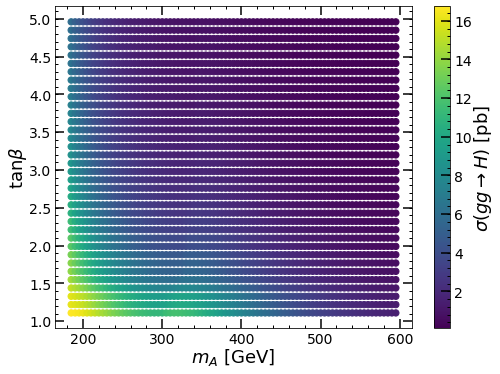

In [9]:
f,a = plt.subplots()
df.plot.scatter('mA', 'tanb', c='xsec_gg_H', cmap='viridis', s=40, ax=a)
cb = f.get_axes()[1]
cb.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]")
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

### Profile along $\tan\beta$ for a fixed $m_{A}$

#### Fixed $m_{A} = 300$

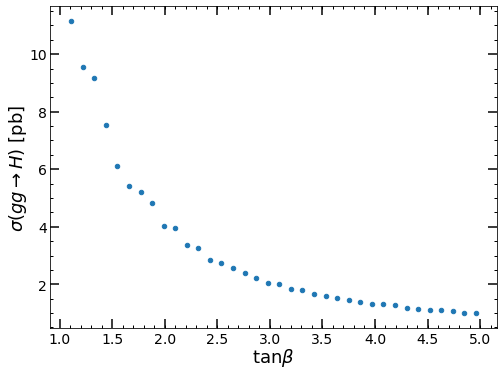

In [10]:
f,a = plt.subplots()
df.query('mA == 300.0').plot.scatter('tanb', 'xsec_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

$\sigma(gg \rightarrow H)$ displays some ragged structures along $\tan \beta$, even though $\tan \beta$ is increased $\sigma(gg \rightarrow H)$ stays the same for some pairs of points

#### Fixed $m_{A} = 400$

This feature is present along all values of $m_{A}$, here is one for $m_{A} = 400$ GeV

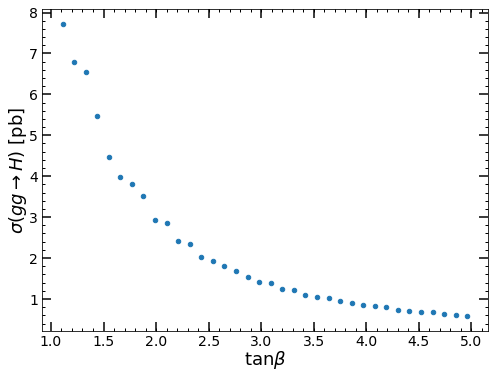

In [11]:
f,a = plt.subplots()
df.query('mA == 400.0').plot.scatter('tanb', 'xsec_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

#### Fixed $m_{A} = 450$

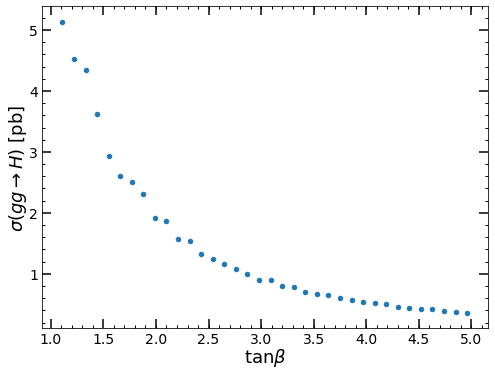

In [12]:
f,a = plt.subplots()
df.query('mA == 450.0').plot.scatter('tanb', 'xsec_gg_H', ax=a)
a.set_xlabel(r"$\tan \beta$")
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

For comparison here is how $\mathcal{B}r(H \rightarrow hh)$ and $m_{H}$ looks like

<font color='red' size=5>
**This ragged structure unfortunately also affects the heatmap and contour plots, as you can see below.**
</font>

Preparing variables for contour plot

In [13]:
dfmesh = df.pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

### Heatmap plot

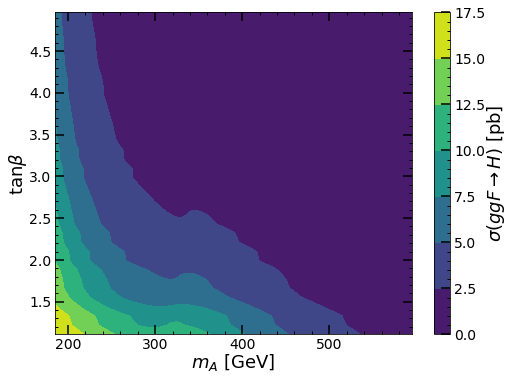

In [14]:
f,a = plt.subplots()
cs = a.contourf(xi,yi,zi)
cb = f.colorbar(cs)
cb.set_label(r'$\sigma(ggF \rightarrow H)$ [pb]')
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

### Contour plot

<a list of 5 text.Text objects>

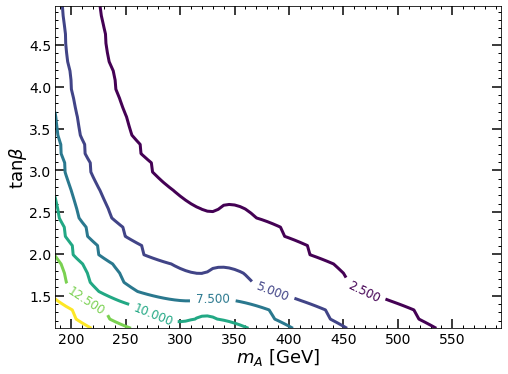

In [15]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)